In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [5]:
#Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on =["city", "city"])

#Display the dataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [14]:
# Create the Urban DataFrame
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [15]:
# create the Suburban and Rural DataFrames
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
#rural_cities_df.head()

In [16]:
# Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()      

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Create the surburban and rural ride count
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]


In [18]:
# Get average fare for each city in the urban cities
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get the average fare for Suburban and Rural cities
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]


In [20]:
# Get the average number of drivers for each urban city
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [21]:
# Get the average number of drivers for each city for the suburban and rural cities
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]


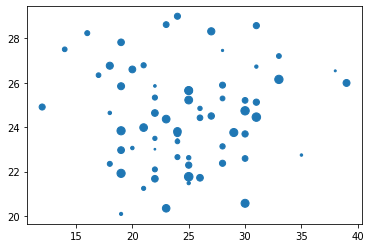

In [22]:
# Build the scatterplots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count)

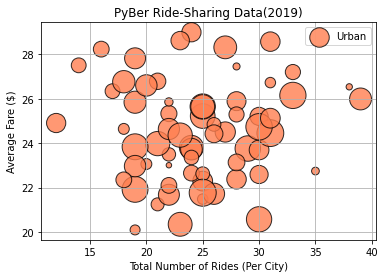

In [23]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

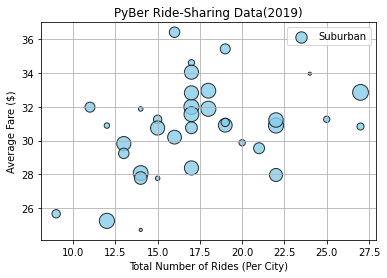

In [24]:
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

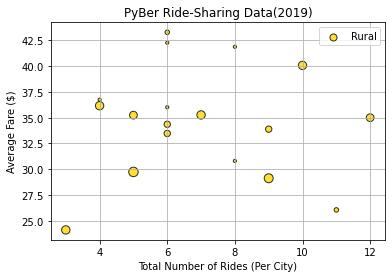

In [25]:
# Build the scatterplot for Rural Cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

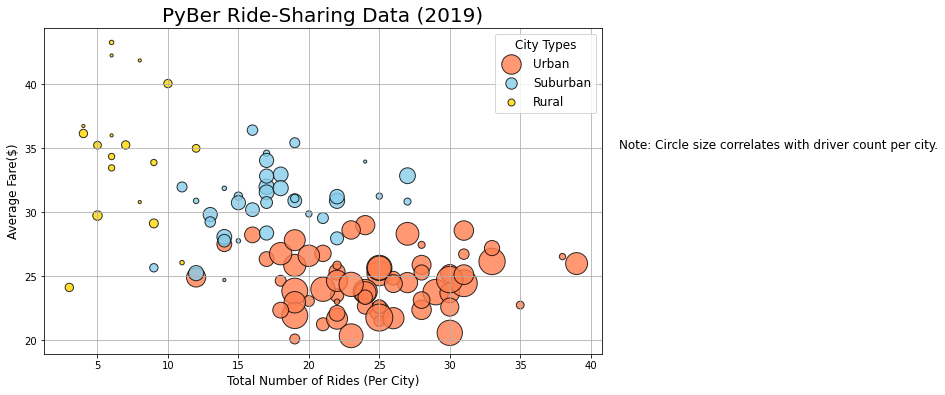

In [26]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidth=1,
            alpha=0.8, label="Rural")

#Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend
lgnd=plt.legend(fontsize="12", mode="Expanded",
                scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._size=[75]
lgnd.legendHandles[1]._size=[75]
lgnd.legendHandles[2]._size=[75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Save the Figure
plt.savefig("Analysis/Fig1.png")

#Show the plot
plt.show()

In [27]:
# Get summary statistics
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
# Get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the mean of teh ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
# Calculate the median
urban_ride_count.median()

24.0

In [31]:
#Calculate mode
suburban_ride_count.mode()

0    17
dtype: int64

In [32]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts


In [33]:
# Calculate the measure of central tendency for the ride count for the urban cities
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [34]:
mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [35]:
mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [36]:
# Get the fares for the urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [37]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [38]:
# Get the fares for the suburban and rural cities
suburban_fares=suburban_cities_df["fare"]
rural_fares=rural_cities_df["fare"]


In [39]:
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares=np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares=sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [40]:
# Get the driver count from the urban cities
urban_drivers=urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [41]:
#Get the driver count for suburban and rural
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers=rural_cities_df["driver_count"]


In [42]:
# Find the mean number of drivers for all three types
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.0f}.")

mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.0f}.")

mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.0f}.")


The mean number of drivers for urban cities is 37.
The mean number of drivers for suburban cities is 14.
The mean number of drivers for rural cities is 4.


In [43]:
# Find the median and mode for all three types
median_urban_drivers=np.median(urban_drivers)
print(f"The median number of drivers for urban cities is {median_urban_drivers:.0f}.")

median_suburban_drivers=np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is {median_suburban_drivers:.0f}.")

median_rural_drivers=np.median(rural_drivers)
print(f"The median number of drivers for rural cities is {median_rural_drivers:.0f}.")

mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")

mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")




The median number of drivers for urban cities is 37.
The median number of drivers for suburban cities is 16.
The median number of drivers for rural cities is 4.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


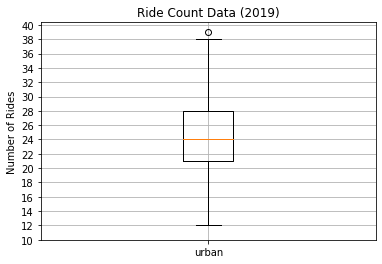

In [44]:
# Create a box and whisker plot for the urban cities ride count
x_labels=["urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2))
ax.grid()
plt.show()

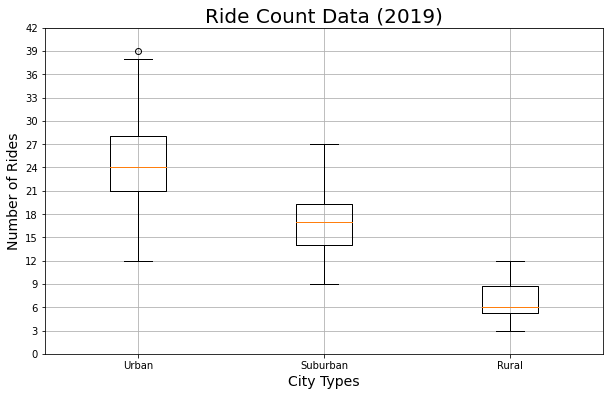

In [45]:
# Add all ride count box and whisker plots to the same graph
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3))
ax.grid()

# save the figure
plt.savefig("Analysis/Fig2.png")
plt.show()

In [46]:
# get the city that matches 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


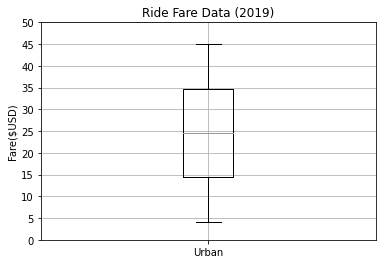

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [47]:
# Create a box and whiskers plot for the urban fare data
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

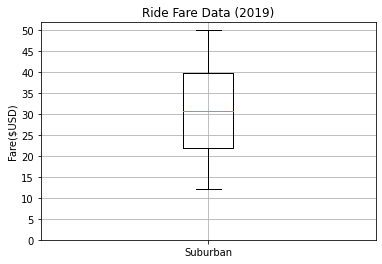

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [48]:
# Create a box and whiskers plot for the suburban fare data
x_labels=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step=5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

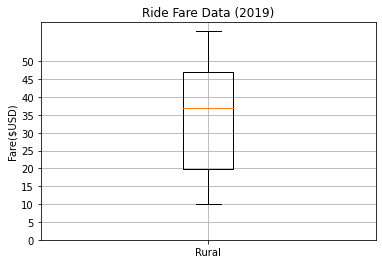

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [49]:
# Create a box and whiskers plot for the rural fare data
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step=5))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

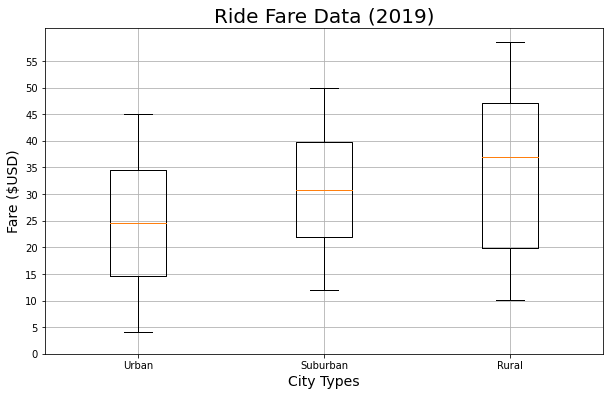

In [50]:
# Add all ride count box and whisker plots to the same graph
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_fares, suburban_fares, rural_fares]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,60,step=5))
ax.grid()

# save the figure
plt.savefig("Analysis/Fig3.png")
plt.show()


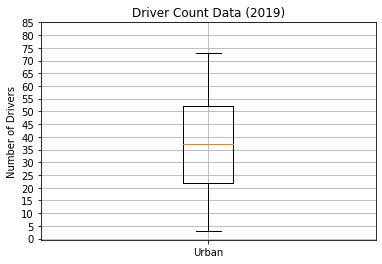

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [51]:
# Create the box and whisker plot for teh urban driver count data
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#Add the title, y-axis and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

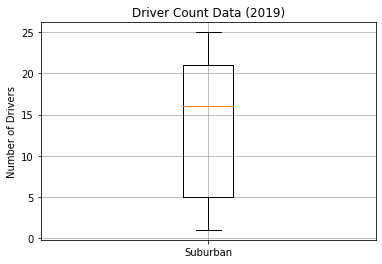

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [52]:
# Create the box and whisker plot for the suburban driver count data
x_labels=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#Add the title, y-axis and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,30,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

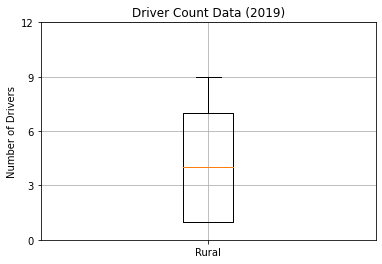

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [53]:
# Create the box and whisker plot for the rural driver count data
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#Add the title, y-axis and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,15,step=3))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

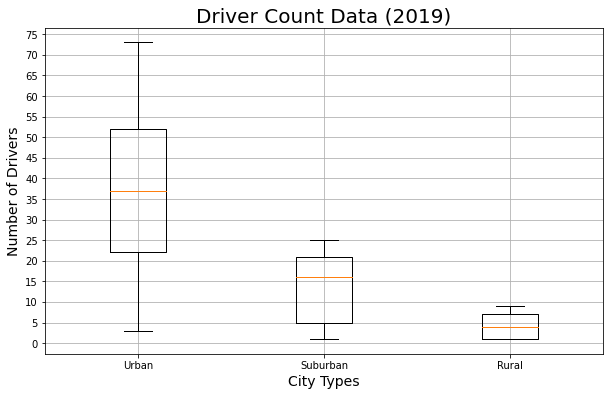

In [54]:
# Add all drivers count box and whisker plots to the same graph
x_labels=["Urban", "Suburban", "Rural"]
driver_count_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,80,step=5))
ax.grid()

# save the figure
plt.savefig("Analysis/Fig4.png")
plt.show()


In [55]:
# Get the sum of the fares for each city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [56]:
#Get the sum of all the fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [57]:
#Calculate the percentage of fare for each city type
types_percents=100*sum_fares_by_type/total_fares
types_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

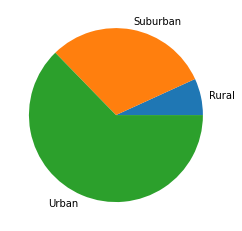

In [58]:
# Build the percentage of fares by city type pie chart
plt.pie(types_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

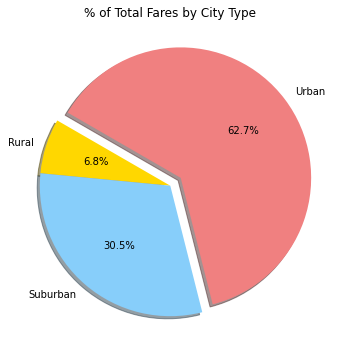

In [59]:
#Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

c

In [60]:
#Get counts of rides by type
count_rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
count_rides_by_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [61]:
#Get total rides
total_rides=pyber_data_df["ride_id"].count()
total_rides

2375

In [62]:
#Calculate the percentage of rides for each city type
ride_percents=100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents
#ride_percents2=100*count_rides_by_type/total_rides
#ride_percents2

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

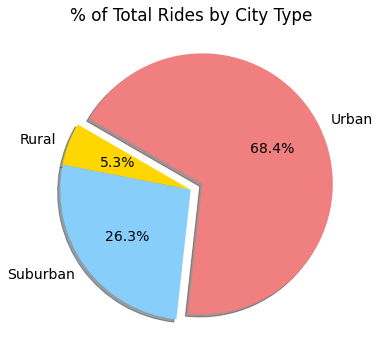

In [63]:
#Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode= [0,0,.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#Change the default font size from 10 to 14
mpl.rcParams["font.size"]=14

#save figure
plt.savefig("Analysis/Fig6.png")

#plot figure
plt.show()